# Health Status Classification

This notebook classifies individuals into "Healthy" or "Patient" categories using SVM and Random Forest classifiers. It includes:
- Data preprocessing
- Training of classifiers
- Comparison of performance metrics
- Visualization of results


## Data Preprocessing

### 1. Import Dependecies

In [252]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Dataset

In [253]:
# Load dataset
data = pd.read_excel(r'colelithiasis_dataset.xlsx')
data.head()

,Patient No.,Gender,Age,Family history,Height,Weight,BMI,Obese/non obese,Cholesterol,Triglycerides level,HDL level,LDL level,VLDL level,Health_status
0,1,Female,65,No,1.64,64,23.80,Non-obese,145,119,60,66.0,19.0,healthy
1,2,Female,50,Yes,1.70,70,24.22,Non-obese,220,107,69,134.0,17.0,healthy
2,3,Female,45,No,1.67,63,22.59,Non-obese,190,251,42,108.0,40.0,healthy
3,4,Female,48,No,1.61,79,30.48,Obese,228,185,65,134.0,29.0,healthy
4,5,Male,74,No,1.76,83,26.79,Non-obese,157,113,49,90.0,18.0,healthy


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient No.          100 non-null    int64  
 1   Gender               100 non-null    object 
 2   Age                  100 non-null    int64  
 3   Family history       100 non-null    object 
 4   Height               100 non-null    float64
 5   Weight               100 non-null    int64  
 6   BMI                  100 non-null    float64
 7   Obese/non obese      100 non-null    object 
 8   Cholesterol          100 non-null    int64  
 9   Triglycerides level  100 non-null    int64  
 10  HDL level            100 non-null    int64  
 11  LDL level            100 non-null    float64
 12  VLDL level           100 non-null    float64
 13  Health_status        100 non-null    object 
dtypes: float64(4), int64(6), object(4)
memory usage: 11.1+ KB


In [10]:
data['Health_status'].value_counts()

Health_status
patient    60
healthy    40
Name: count, dtype: int64

In [11]:
# Drop unnecessary columns (e.g., Patient No.)
data = data.drop(columns=['Patient No.'])

### 3. Feature Encoding

In [12]:
# Encode categorical variables
le_health_status = LabelEncoder()
data['Health_status'] = le_health_status.fit_transform(data['Health_status']) # 0 for healthy, 1 for patient
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender']) # 0 for Female, 1 for Male
le_family_history = LabelEncoder()
data['Family history'] = le_family_history.fit_transform(data['Family history']) # 0 for No, 1 for Yes
le_obese = LabelEncoder()
data['Obese/non obese'] = le_obese.fit_transform(data['Obese/non obese']) # 0 for Non-obese, 1 for Obese

### 4. Split features and target

In [13]:
# Features and target
X = data.drop(columns=['Health_status'])
y = data['Health_status']


### 5. Split data into training and testing sets

In [244]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 6. Scalling the features

In [245]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training of classifiers

### 1. Support Vector Machine (SVM)

In [246]:
# SVM Classifier
svm_model = SVC(kernel='linear', C=0.9, random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

### 2. Random Forest Classifier

In [247]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

## Comparison of performance metrics

In [249]:
def print_metrics(y_true, y_pred, model_name):
    print(f"\nPerformance Metrics for {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

print_metrics(y_test, svm_preds, "SVM")
print_metrics(y_test, rf_preds, "Random Forest")


Performance Metrics for SVM
Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.78      0.58      0.67        12

    accuracy                           0.65        20
   macro avg       0.66      0.67      0.65        20
weighted avg       0.68      0.65      0.65        20


Performance Metrics for Random Forest
Accuracy: 0.7

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.80      0.67      0.73        12

    accuracy                           0.70        20
   macro avg       0.70      0.71      0.70        20
weighted avg       0.72      0.70      0.70        20



## Visualization of results

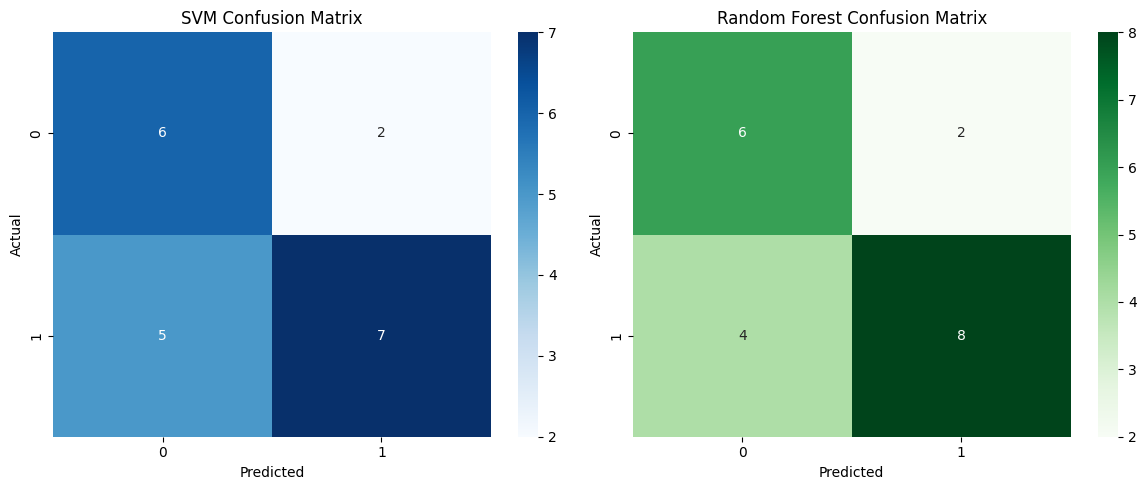

In [251]:
# Confusion Matrices
svm_cm = confusion_matrix(y_test, svm_preds)
rf_cm = confusion_matrix(y_test, rf_preds)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
